In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker

import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## -------------------------
### BRAZILIAN CASE
## -------------------------

In [2]:
df_base = pd.read_excel(r"Brasil_Recall.xlsx")
years = []
begin = 2010 # incluso
end = 2020   # nao incluso

for k in range(begin,end):
    years.append(k)
    
number_of_calls = []
number_of_affected_vehicles = []

#note that we consider the year of each call as the year of its initial date

for year in years:
    number_of_calls.append(df_base[df_base['Data Início'].str.contains(str(year))].shape[0])
    number_of_affected_vehicles.append(df_base[df_base['Data Início'].str.contains(str(year))]['Quantidade Afetada'].sum())
    
df_calls = pd.DataFrame({'Dates': years, 'Number of calls': number_of_calls})
df_affected = pd.DataFrame({'Dates': years, 'Number of affected vehicles': number_of_affected_vehicles})

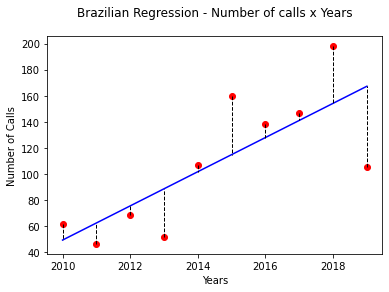

Coefficients: [[13.14545455]]
Mean squared error: 988.0654545454545
Coefficient of determination: 0.5906411119300927


In [3]:
regr = linear_model.LinearRegression()
x = df_calls[['Dates']]
y = df_calls[['Number of calls']]
regr.fit(x,y)

x_br_calls = x.copy()
y_br_calls = y.copy()
predict_br_calls = regr.predict(x).copy()

plt.scatter(x, y, color = 'red')
plt.plot(x, regr.predict(x), color = 'blue')
plt.title('Brazilian Regression - Number of calls x Years', pad = 20)
plt.xlabel('Years')
plt.ylabel('Number of Calls')
for i in range(len(x)):
    lineXdata = (x['Dates'][i], x['Dates'][i]) # same X
    lineYdata = (y['Number of calls'][i], regr.predict(x)[i]) # different Y
    plt.plot(lineXdata, lineYdata, color='black', linewidth = 1,linestyle='dashed')
plt.show()

# The coefficients
print(f'Coefficients: {regr.coef_}')
# The mean squared error
print(f'Mean squared error: {mean_squared_error(y, regr.predict(x))}')
# The coefficient of determination: 1 is perfect prediction
print(f'Coefficient of determination: {r2_score(y, regr.predict(x))}')

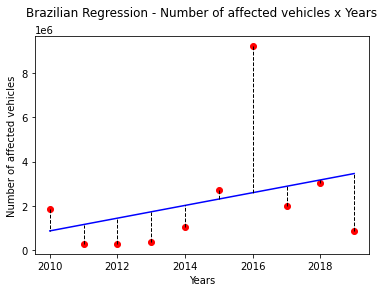

Coefficients: [[288598.21818182]]
Mean squared error: 5761621933986.244
Coefficient of determination: 0.10655291125365607


In [4]:
regr = linear_model.LinearRegression()
x = df_affected[['Dates']]
y = df_affected[['Number of affected vehicles']]
regr.fit(x,y)

x_br_affected = x.copy()
y_br_affected = y.copy()
predict_br_affected = regr.predict(x).copy()

plt.scatter(x, y, color = 'red')
plt.plot(x, regr.predict(x), color = 'blue')
plt.title('Brazilian Regression - Number of affected vehicles x Years', pad = 20)
plt.xlabel('Years')
plt.ylabel('Number of affected vehicles')
for i in range(len(x)):
    lineXdata = (x['Dates'][i], x['Dates'][i]) # same X
    lineYdata = (y['Number of affected vehicles'][i], regr.predict(x)[i]) # different Y
    plt.plot(lineXdata, lineYdata, color='black', linewidth = 1,linestyle='dashed')
plt.show()

# The coefficients
print(f'Coefficients: {regr.coef_}')
# The mean squared error
print(f'Mean squared error: {mean_squared_error(y, regr.predict(x))}')
# The coefficient of determination: 1 is perfect prediction
print(f'Coefficient of determination: {r2_score(y, regr.predict(x))}')

## -------------------------
### AMERICAN CASE
## -------------------------

In [3]:
import pandas as pd
number_of_calls = []
number_of_affected_vehicles = []

df_base = pd.read_excel(r"EUA_Recall_Code.xlsx")
years = []
begin = 2010 # incluso
end = 2020   # nao incluso
df_base = df_base[df_base['Report received date'].notna()]
df_base['Report received date'] = df_base['Report received date'].apply(int)
df_base['Report received date'] = df_base['Report received date'].apply(str)
df_base = df_base.drop_duplicates(subset='NHTSA campaign number', keep="last")
for k in range(begin,end):
    years.append(k)
    
for year in years:
    number_of_calls.append(df_base[df_base['Report received date'].str.startswith(str(year))].shape[0])
    number_of_affected_vehicles.append(df_base[df_base['Report received date'].str.startswith(str(year))]['Potential number of units affected'].sum())

#note that we consider the year of each call as the year of its initial date

df_calls = pd.DataFrame({'Dates': years, 'Number of calls': number_of_calls})
df_affected = pd.DataFrame({'Dates': years, 'Number of affected vehicles': number_of_affected_vehicles})

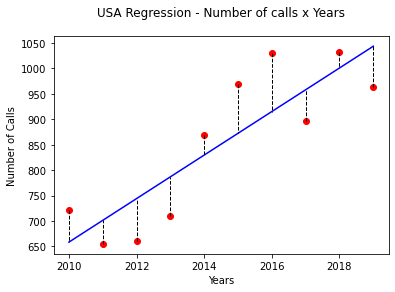

Coefficients: [[42.79393939]]
Mean squared error: 5448.489696969714
Coefficient of determination: 0.7349555454657921


In [6]:
regr = linear_model.LinearRegression()
x = df_calls[['Dates']]
y = df_calls[['Number of calls']]
regr.fit(x,y)
x_usa_calls = x.copy()
y_usa_calls = y.copy()
predict_usa_calls = regr.predict(x).copy()
plt.scatter(x, y, color = 'red')
plt.plot(x, regr.predict(x), color = 'blue')
plt.title('USA Regression - Number of calls x Years', pad = 20)
plt.xlabel('Years')
plt.ylabel('Number of Calls')
for i in range(len(x)):
    lineXdata = (x['Dates'][i], x['Dates'][i]) # same X
    lineYdata = (y['Number of calls'][i], regr.predict(x)[i]) # different Y
    plt.plot(lineXdata, lineYdata, color='black', linewidth = 1,linestyle='dashed')
plt.show()

# The coefficients
print(f'Coefficients: {regr.coef_}')
# The mean squared error
print(f'Mean squared error: {mean_squared_error(y, regr.predict(x))}')
# The coefficient of determination: 1 is perfect prediction
print(f'Coefficient of determination: {r2_score(y, regr.predict(x))}')

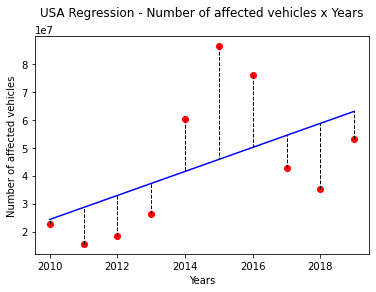

Coefficients: [[4298494.43636364]]
Mean squared error: 396045806318471.44
Coefficient of determination: 0.277923134131831


In [7]:
regr = linear_model.LinearRegression()
x = df_affected[['Dates']]
y = df_affected[['Number of affected vehicles']]
regr.fit(x,y)
x_usa_affected = x.copy()
y_usa_affected = y.copy()
predict_usa_affected = regr.predict(x).copy()


plt.scatter(x, y, color = 'red')
plt.plot(x, regr.predict(x), color = 'blue')
plt.title('USA Regression - Number of affected vehicles x Years', pad = 20)
plt.xlabel('Years')
plt.ylabel('Number of affected vehicles')
for i in range(len(x)):
    lineXdata = (x['Dates'][i], x['Dates'][i]) # same X
    lineYdata = (y['Number of affected vehicles'][i], regr.predict(x)[i]) # different Y
    plt.plot(lineXdata, lineYdata, color='black', linewidth = 1,linestyle='dashed')
plt.show()

# The coefficients
print(f'Coefficients: {regr.coef_}')
# The mean squared error
print(f'Mean squared error: {mean_squared_error(y, regr.predict(x))}')
# The coefficient of determination: 1 is perfect prediction
print(f'Coefficient of determination: {r2_score(y, regr.predict(x))}')

## -------------------------
### EUROPEAN CASE
## -------------------------

In [8]:
number_of_calls = []
number_of_affected_vehicles = []

df_base = pd.read_excel(r"UE_Recall_Code.xlsx")
years = []
begin = 2010 # incluso
end = 2020   # nao incluso

df_base = df_base[df_base['Year'].notna()]
df_base['Year'] = df_base['Year'].apply(int)
df_base['Year'] = df_base['Year'].apply(str)

for k in range(begin,end):
    years.append(k)
    
for year in years:
    number_of_calls.append(df_base[df_base['Year'].str.startswith(str(year))].shape[0])

#note that we consider the year of each call as the year of its initial date

df_calls = pd.DataFrame({'Dates': years, 'Number of calls': number_of_calls})

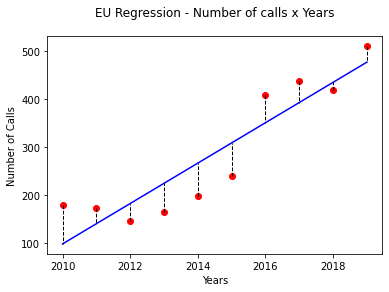

Coefficients: [[42.10909091]]
Mean squared error: 2830.7418181816392
Coefficient of determination: 0.8378675479750989


In [9]:
regr = linear_model.LinearRegression()
x = df_calls[['Dates']]
y = df_calls[['Number of calls']]
regr.fit(x,y)
x_eu_calls = x.copy()
y_eu_calls = y.copy()
predict_eu_calls = regr.predict(x).copy()

plt.scatter(x, y, color = 'red')
plt.plot(x, regr.predict(x), color = 'blue')
plt.title('EU Regression - Number of calls x Years', pad = 20)
plt.xlabel('Years')
plt.ylabel('Number of Calls')
for i in range(len(x)):
    lineXdata = (x['Dates'][i], x['Dates'][i]) # same X
    lineYdata = (y['Number of calls'][i], regr.predict(x)[i]) # different Y
    plt.plot(lineXdata, lineYdata, color='black', linewidth = 1,linestyle='dashed')
plt.show()

# The coefficients
print(f'Coefficients: {regr.coef_}')
# The mean squared error
print(f'Mean squared error: {mean_squared_error(y, regr.predict(x))}')
# The coefficient of determination: 1 is perfect prediction
print(f'Coefficient of determination: {r2_score(y, regr.predict(x))}')

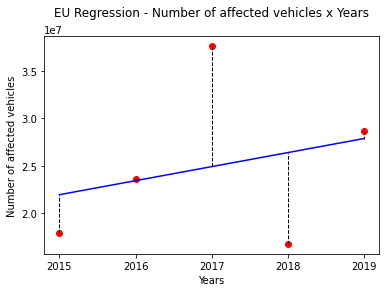

Coefficients: [[1480670.]]
Mean squared error: 54297000872538.8
Coefficient of determination: 0.07472111755515098


In [18]:
df_email = pd.DataFrame({'Dates':[int(2015),int(2016),int(2017),int(2018),int(2019)], 'Number of affected vehicles':[15887066+2013840,21501295+2087995,35923106+1702191,15498202+1265350,26893446+1823679]})
regr = linear_model.LinearRegression()
x = df_email[['Dates']]
y = df_email[['Number of affected vehicles']]
regr.fit(x,y)
x_eu_affected = x.copy()
y_eu_affected = y.copy()
predict_eu_affected = regr.predict(x).copy()


plt.scatter(x, y, color = 'red')
plt.plot(x, regr.predict(x), color = 'blue')
plt.title('EU Regression - Number of affected vehicles x Years', pad = 20)
plt.xlabel('Years')
plt.ylabel('Number of affected vehicles')
for i in range(len(x)):
    lineXdata = (x['Dates'][i], x['Dates'][i]) # same X
    lineYdata = (y['Number of affected vehicles'][i], regr.predict(x)[i]) # different Y
    plt.plot(lineXdata, lineYdata, color='black', linewidth = 1,linestyle='dashed')

locator = matplotlib.ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()
# The coefficients
print(f'Coefficients: {regr.coef_}')
# The mean squared error
print(f'Mean squared error: {mean_squared_error(y, regr.predict(x))}')
# The coefficient of determination: 1 is perfect prediction
print(f'Coefficient of determination: {r2_score(y, regr.predict(x))}')

## -------------------------
### ALL CASES
## -------------------------

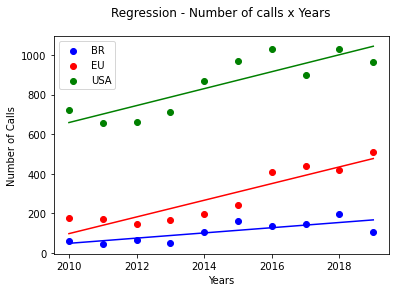

In [11]:
plt.scatter(x_br_calls,y_br_calls, color='blue', label='BR')
plt.plot(x_br_calls, predict_br_calls, color = 'blue')
plt.scatter(x_eu_calls,y_eu_calls, color='red', label='EU')
plt.plot(x_eu_calls, predict_eu_calls, color = 'red')
plt.scatter(x_usa_calls,y_usa_calls, color='green', label='USA')
plt.plot(x_usa_calls, predict_usa_calls, color = 'green')
plt.title('Regression - Number of calls x Years', pad = 20)
plt.xlabel('Years')
plt.ylabel('Number of Calls')
plt.legend(loc="upper left")
plt.show()

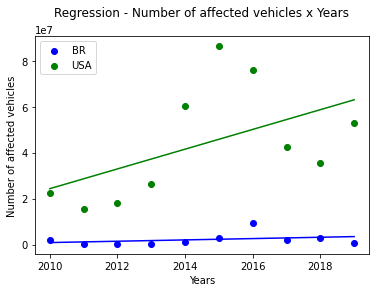

In [12]:
plt.scatter(x_br_affected,y_br_affected, color='blue', label = 'BR')
plt.plot(x_br_affected, predict_br_affected, color = 'blue')

plt.scatter(x_usa_affected,y_usa_affected, color='green', label = 'USA')
plt.plot(x_usa_affected, predict_usa_affected, color = 'green')

plt.title('Regression - Number of affected vehicles x Years', pad = 20)
plt.xlabel('Years')
plt.ylabel('Number of affected vehicles')
plt.legend(loc="upper left")
plt.show()

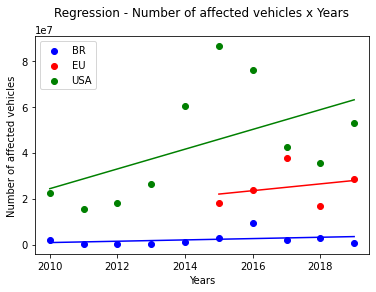

In [13]:
plt.scatter(x_br_affected,y_br_affected, color='blue', label = 'BR')
plt.plot(x_br_affected, predict_br_affected, color = 'blue')

plt.scatter(x_eu_affected,y_eu_affected, color='red', label = 'EU')
plt.plot(x_eu_affected, predict_eu_affected, color = 'red')

plt.scatter(x_usa_affected,y_usa_affected, color='green', label = 'USA')
plt.plot(x_usa_affected, predict_usa_affected, color = 'green')

plt.title('Regression - Number of affected vehicles x Years', pad = 20)
plt.xlabel('Years')
plt.ylabel('Number of affected vehicles')
plt.legend(loc="upper left")
plt.show()